In [1]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.40. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [2]:
datapath = '../Auto_TS/example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, engine='python')
print(dataset.shape)
dataset.head()

(48, 3)


,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


In [3]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

# Train Model

In [4]:
FORECAST_PERIOD = 12

In [5]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['ML'],
                verbose=2)

In [6]:
num = 44
traindata = dataset[:num]
testdata = dataset[num:]
print(traindata.shape, testdata.shape)

(44, 3) (4, 3)


Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.7308612698009107      |
|           p-value           |      0.4152860439298812      |
|          #Lags Used         |             0.0              |
| Number of Observations Used |             43.0             |
|     Critical Value (1%)     |     -3.5925042342183704      |
|     Critical Value (5%)     |      -2.931549768951162      |
|     Critical Value (10%)    |      -2.60406594375338       |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+------------------

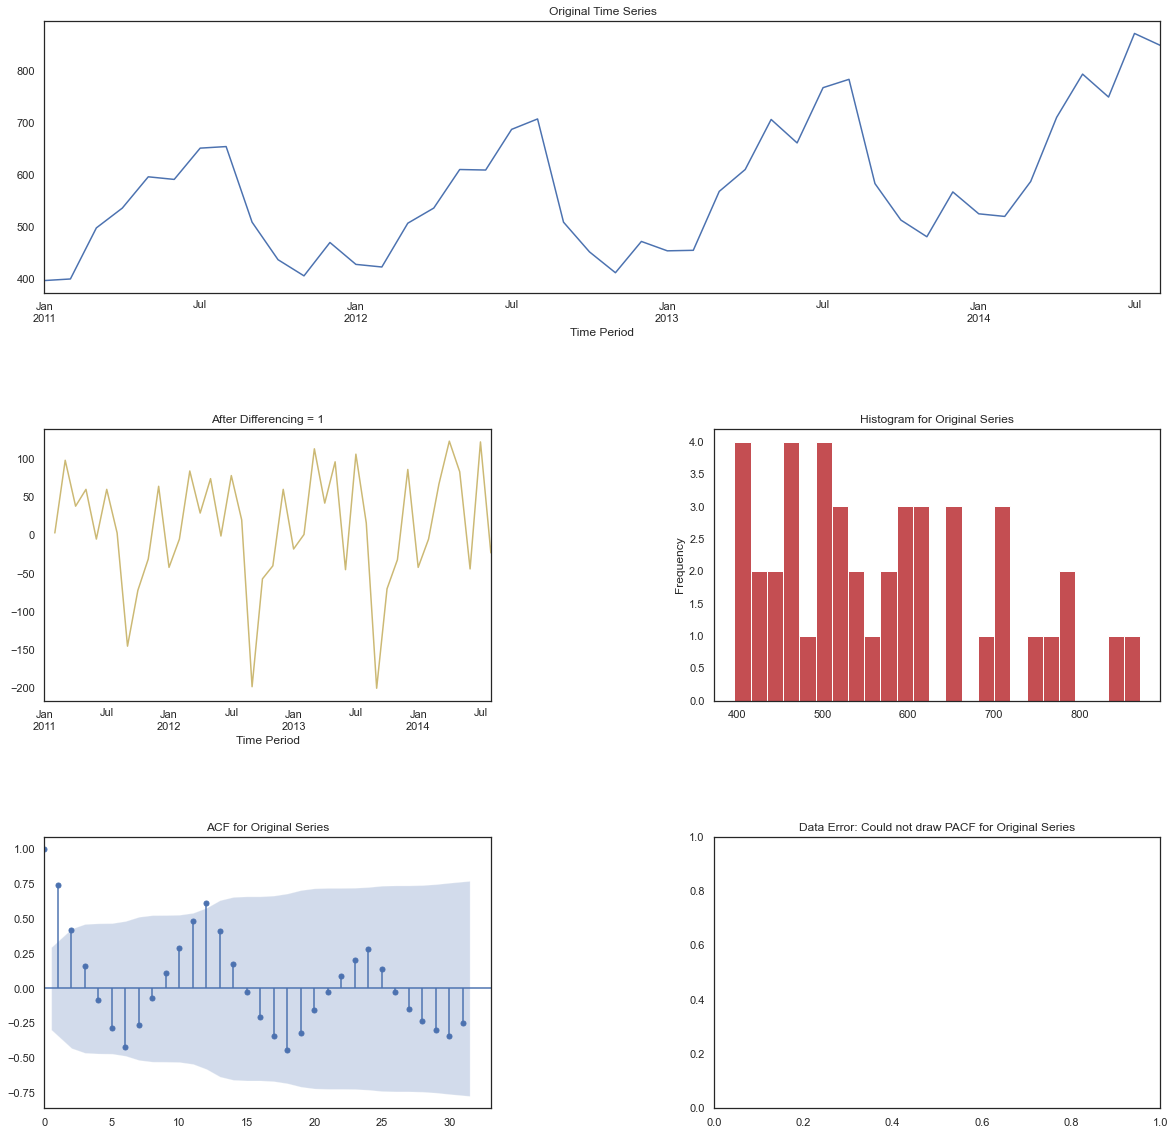

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building ML Model



Running Machine Learning Models...
    Shifting 1 predictors by lag=4 to align prior predictor with current target...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    1 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

Fitting ML model
    19 variables used in training ML model = ['Marketing Expense(t)', 'Marketing Expense(t-4)', 'Sales(t-4)', 'Marketing Expense(t-3)', 'Sales(t-3)', 'Marketing Expense(t-2)', 'Sales(t-2)', 'Marketing Expense(t-1)', 'Sales(t-1)', 'Time Period_hour', 'Time Period_minute', 'Time Period_dayofweek', 'Time Period_quarter', 'Time Period_month', 'Time Period_year', 'Time Period_dayofyear', 'Time Period_dayofmonth', 'Time Period_weekofyear', 'Time Period_weekend']

Running Cross Validation using XGBoost mode

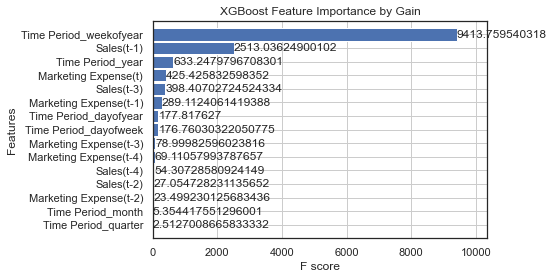

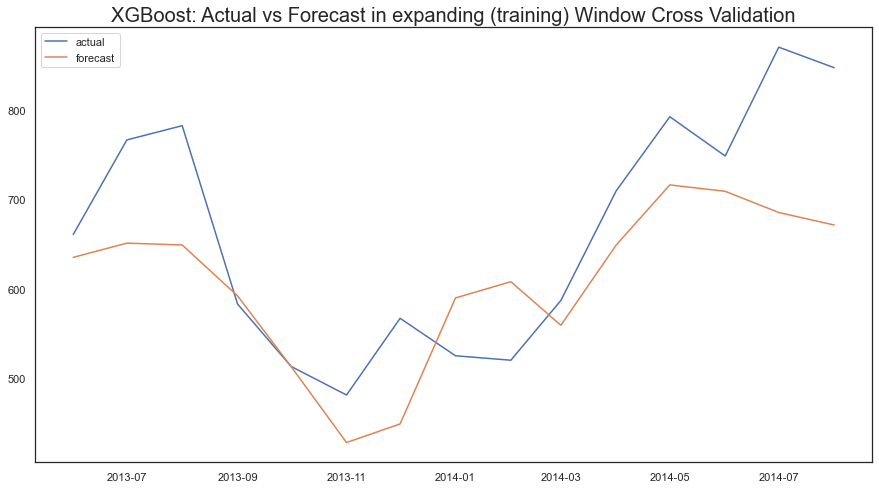

In [7]:
model.fit(
    traindata=traindata,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [8]:
model.get_leaderboard()

,name,rmse
0,ML,93.567854


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

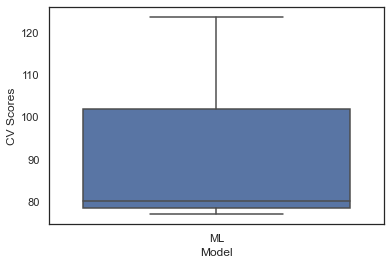

In [9]:
model.plot_cv_scores()

In [10]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,ML,80.027722
1,ML,76.930474
2,ML,123.745366


In [11]:
results_dict = model.get_ml_dict()

In [12]:
results_dict['Prophet']['forecast']  

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [13]:
results_dict['auto_SARIMAX']['forecast'] 

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [14]:
results_dict['ML']['forecast'] 

[array([635.3427 , 651.30115, 649.2313 , 592.14154, 512.8169 ],
       dtype=float32),
 array([427.72192, 448.5881 , 589.83997, 608.0526 , 559.1778 ],
       dtype=float32),
 array([649.2593 , 716.59186, 709.386  , 685.6318 , 671.63025],
       dtype=float32)]

In [15]:
testdata['preds'] = model.predict(testdata, model='ML', simple=False)['yhat'].values

Predicting using test dataframe as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    train time series Time Period column exists ...
Your testdata dataframe contains the target column as well. This will be deleted for the predictions.
    ML predictions completed


<AxesSubplot:>

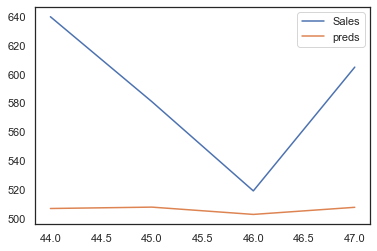

In [16]:
testdata[[target, 'preds']].plot()

In [17]:
testdata

,Time Period,Sales,Marketing Expense,preds
44,2014-09-01,640,718.98,506.763031
45,2014-10-01,581,570.30,507.718658
46,2014-11-01,519,527.60,502.653412
47,2014-12-01,605,559.75,507.591766


# Forecast Results

In [19]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

Predicting using forecast period=12 as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
(Error) Testdata must be pandas dataframe for ML model. No predictions will be made.


In [20]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Predicting using forecast period=12 as input for ML model
(Error) Model of type 'auto_SARIMAX' does not exist. No predictions will be made.


In [21]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Predicting using forecast period=12 as input for ML model
(Error) Model of type 'Prophet' does not exist. No predictions will be made.


In [22]:
model.get_best_model()

XGBRegressor(n_estimators=400, verbosity=0)

In [23]:
xgb_model = model.get_model('ML')
xgb_model

XGBRegressor(n_estimators=400, verbosity=0)

In [24]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [25]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [26]:
dataset['yhat'] = model.predict(dataset, model='ML', simple=False)['yhat'].values

Predicting using test dataframe as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    train time series Time Period column exists ...
Your testdata dataframe contains the target column as well. This will be deleted for the predictions.
    ML predictions completed


<AxesSubplot:>

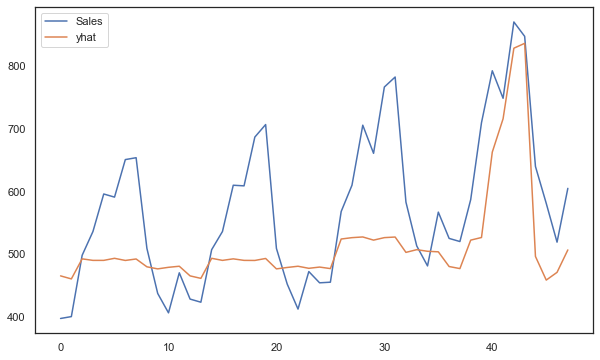

In [27]:
dataset[[target,'yhat']].plot(figsize=(10,6))